In [34]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import numpy as np


In [35]:
!pip install tensorflow

Load the MNIST dataset

In [36]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [6 4 4 3 5 4 8 1 6 9]


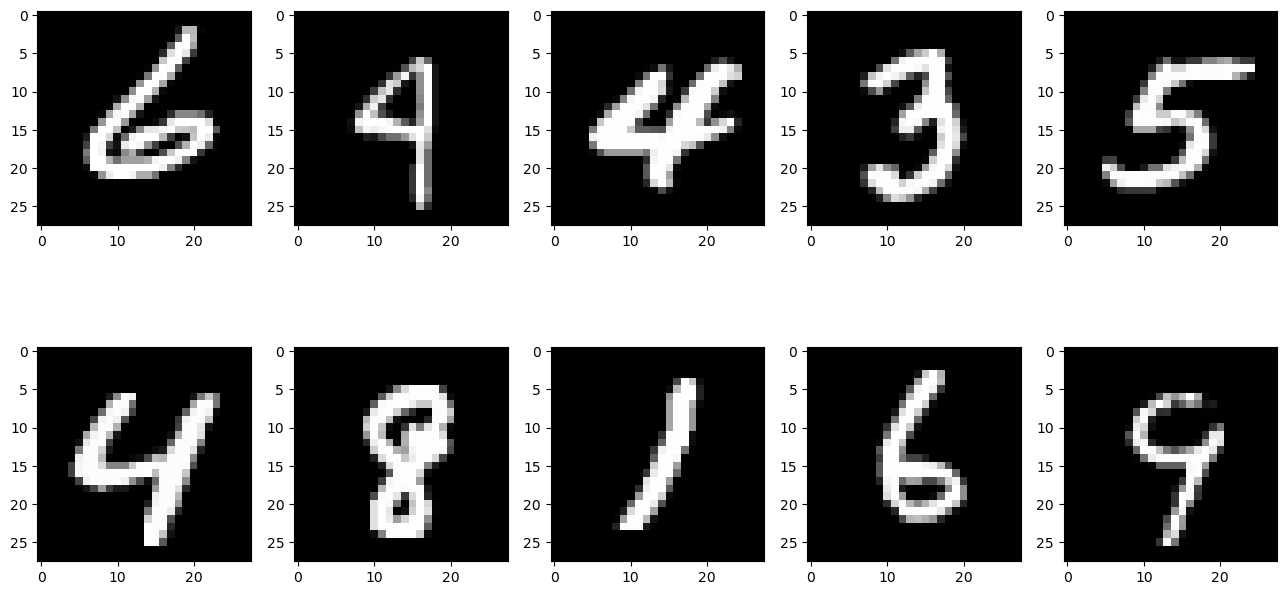

In [37]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [38]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [39]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# Change the hyperparameters and add L1 and L2 regularization terms 
model.add(Dense(128,activation='relu',  kernel_regularizer=l2(0.01)))  # Increased number of units
model.add(BatchNormalization())  # Added batch normalization
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.3))  # Added dropout
model.add(Dense(32,input_dim=64,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                      

Train the model

In [41]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5942 - accuracy: 0.8708
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7364 - accuracy: 0.9136
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6453 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6026 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5738 - accuracy: 0.9235
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5612 - accuracy: 0.9232
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5431 - accuracy: 0.9226
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5325 - accuracy: 0.9242
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5265 - accuracy: 0.9242
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.523

Plot the loss and accuracy graphs

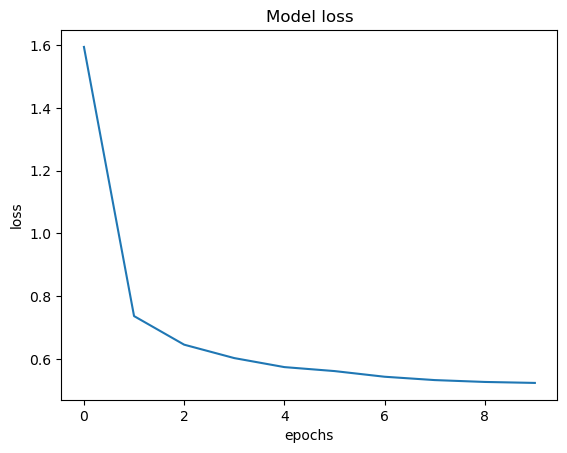

In [42]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

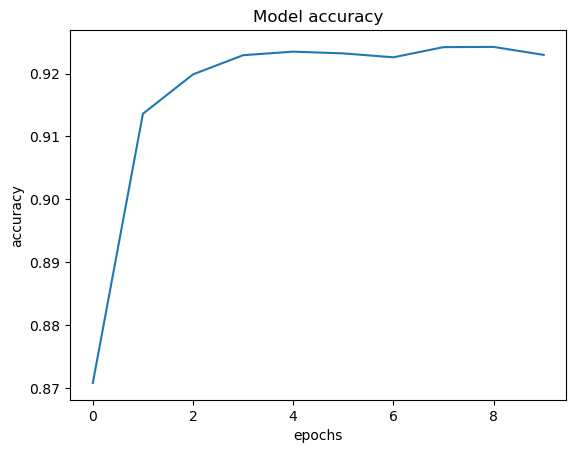

In [43]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [44]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4511 - accuracy: 0.9460
Loss of the Test dataset is: 0.4511175751686096
Accuracy of the test dataset is: 0.9459999799728394


Save the model weights

In [45]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

In [47]:
%matplotlib inline

313/313 [==============================] - 1s 4ms/step


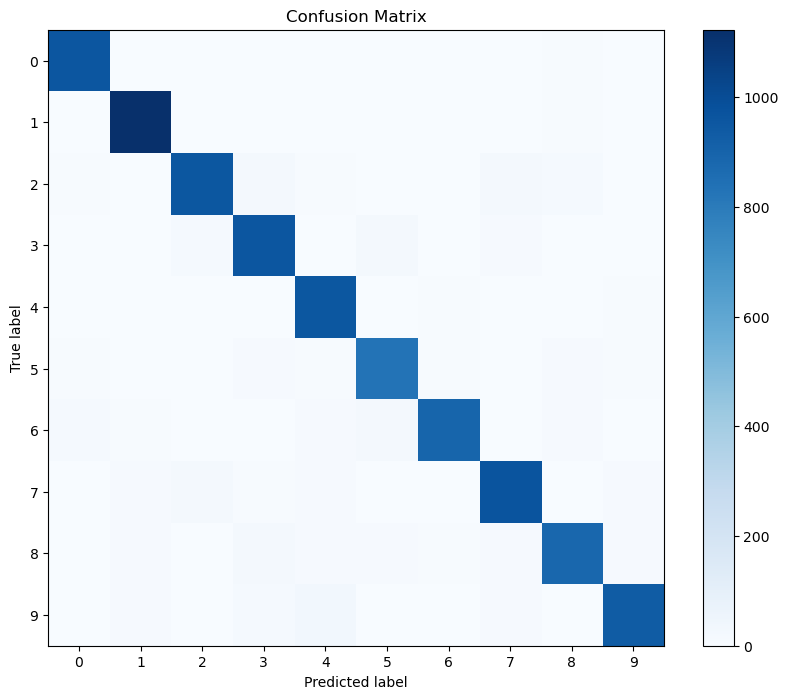

In [51]:
# Generate predictions
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_target, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and ticks
classes = [str(i) for i in range(10)]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()